In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\pkgam\Desktop\Basic ML\ML Model\height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Height vs Weight')

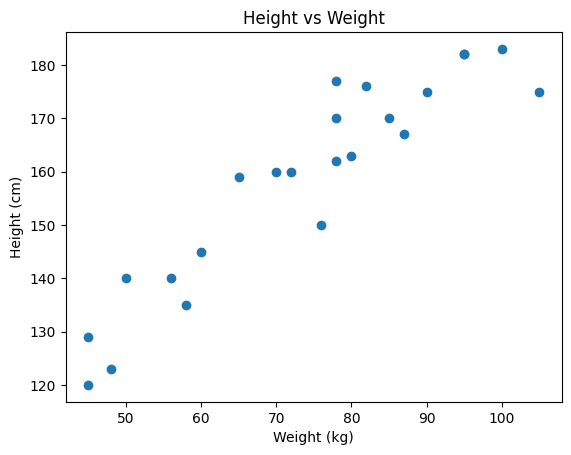

In [4]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.title('Height vs Weight')

### Divide into dependant and independant features

In [5]:
x = df['Weight'] # independent variable
y = df['Height'] # dependent variable

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
x.shape

(23,)

In [8]:
x_train.shape, x_test.shape

((18,), (5,))